# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs.

In [2]:
!pip install langchain langchain_openai langchain_community

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
from google.colab import userdata

# ✅ Retrieve and manually inject the secret into environment
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

# ✅ Confirm
print("OPENAI_API_KEY is set:", os.environ.get("OPENAI_API_KEY") is not None)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
OPENAI_API_KEY is set: True


In [4]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [5]:
# import os
# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv())

# OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')


## Dall-E

In [6]:
import openai
from langchain.tools import tool
from langchain.agents import initialize_agent, AgentType
from langchain.chat_models import ChatOpenAI
import sys

In [7]:
# Detect if the environment is Colab
try:
    import google.colab  # If in Colab
    is_colab = True
except ImportError:
    is_colab = False

# Set your OpenAI API key
openai.api_key = "YOUR_KEY"

In [8]:
# Global variable to capture image URL
latest_image_url = None

@tool
def generate_image(prompt: str) -> str:
    """Generate an image using DALL·E based on the given prompt."""
    global latest_image_url
    response = openai.images.generate(
        model="dall-e-3",
        prompt=prompt,
        n=1,
        size="1024x1024"
    )
    image_url = response.data[0].url
    latest_image_url = image_url
    return image_url


In [9]:
openai.api_key = ""


In [10]:

# Initialize the agent
tools = [generate_image]
llm = ChatOpenAI(temperature=0)

agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run the agent
result = agent.invoke("Create an image of a samurai cat riding a skateboard in Times Square.")


<ipython-input-10-ca74fbe4126d>:3: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(temperature=0)
<ipython-input-10-ca74fbe4126d>:5: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-b



> Entering new AgentExecutor chain...
I can use the generate_image tool to create an image based on the prompt given.
Action: generate_image
Action Input: "samurai cat riding a skateboard in Times Square"
Observation: https://oaidalleapiprodscus.blob.core.windows.net/private/org-6JRXnTIanXVz1sKq4vieT4Cr/user-8XKNAS2nZetjE6hc2V2fGn9X/img-KbfFkbYJYOC0cltY7BIvwLk1.png?st=2025-04-19T14%3A11%3A54Z&se=2025-04-19T16%3A11%3A54Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=8b33a531-2df9-46a3-bc02-d4b1430a422c&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-04-19T10%3A01%3A06Z&ske=2025-04-20T10%3A01%3A06Z&sks=b&skv=2024-08-04&sig=CTFd/KtrVACw9KR2OAavocSuZwmpuuP59e/P3aVcoLw%3D
Thought:The image of a samurai cat riding a skateboard in Times Square has been successfully generated.
Final Answer: The image has been created.

> Finished chain.


In [14]:

# Display the image based on the environment
if is_colab:
    # Colab: Use IPython to display image inline
    from IPython.display import Image, display
    display(Image(url=latest_image_url))
else:
    # Local: Use PIL or other method to show the image
    from PIL import Image as PILImage
    import requests
    from io import BytesIO

    # Download and display image
    response = requests.get(latest_image_url)
    img = PILImage.open(BytesIO(response.content))
    img.show()  # This will open the image using the default image viewer


## StableDiffusion

In [12]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

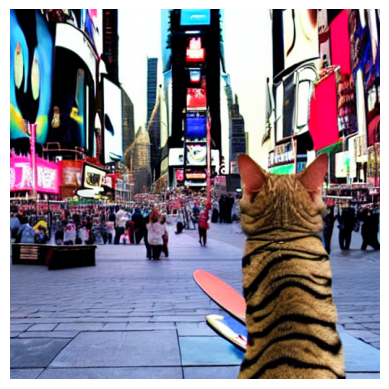

In [18]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32  # use float32 for CPU
)
pipe = pipe.to("cpu")  # 👈 run on CPU instead of CUDA

prompt = "A samurai cat riding a skateboard in Times Square"
image = pipe(prompt).images[0]

plt.imshow(image)
plt.axis("off")
plt.show()


In [19]:
# model_id = "runwayml/stable-diffusion-v1-5"
# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe = pipe.to("cuda")

# prompt = "A samurai cat riding a skateboard in Times Square"
# image = pipe(prompt).images[0]



# # Display the image using matplotlib
# plt.imshow(image)
# plt.axis('off')
# plt.show()



## AutoPipelineForText2Image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

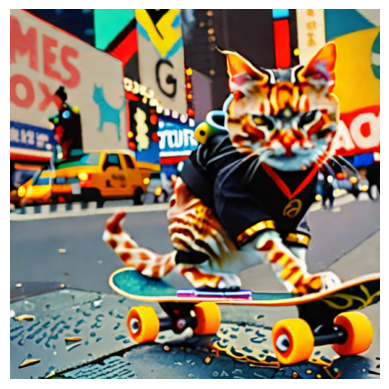

In [13]:
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float32  # Use float32 for CPU
).to("cpu")  # 👈 use CPU instead of CUDA

prompt = "A samurai cat riding a skateboard in Times Square"
image = pipe(prompt).images[0]

plt.imshow(image)
plt.axis("off")
plt.show()

